In this notebook, I will present one type of classifiers:
- $\textbf{Random Forest (RF) Classification}$

The data used in this notebook are the magnitudes in 5 different filters (ugriz) of 3 different objects:
stars, quasars, and white dwarfs.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.rcParams['legend.numpoints']=1
plt.rcParams['xtick.major.size'] = 11
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 11
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.visible']=True #See minor tick
plt.rcParams['text.usetex']=True #use Latex
plt.rcParams['axes.linewidth']=2 #width axes
plt.rcParams['axes.labelsize']=25 #
plt.rcParams['ytick.labelsize']=22 #fontsize of tick labels
plt.rcParams['xtick.labelsize']=22 #fontsize of tick labels
plt.rcParams['ytick.direction']='inout' ## direction: in, out, or inout
plt.rcParams['xtick.direction']='inout' ## direction: in, out, or inout

plt.rcParams['xtick.major.top']=True #draw x axis top major ticks
plt.rcParams['xtick.major.bottom']=True #draw x axis bottom major ticks
plt.rcParams['xtick.minor.top']=True ## draw x axis top minor ticks
plt.rcParams['xtick.minor.bottom']=True #draw x axis bottom minor ticks

plt.rcParams['ytick.major.left']=True #draw y axis left major ticks
plt.rcParams['ytick.major.right']=True #draw y axis right major ticks
plt.rcParams['ytick.minor.left']=True ## draw y axis left minor ticks
plt.rcParams['ytick.minor.right']=True #draw y axis right minor ticks


plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize']=22
plt.rcParams['figure.titlesize']=22

plt.rcParams['text.latex.preamble']=[r'\boldmath']

## 1) Import and look at the data

The labels are known and correspond to 1=star, 2=quasar, 3=white dwarf

In [3]:
df = pd.read_csv("Data/SDSS_all_classes_21.csv")
#Let's select only 20 000 objects 
df = df.sample (20000)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 25539 to 19930
Data columns (total 7 columns):
class      20000 non-null int64
u_mag      20000 non-null float64
g_mag      20000 non-null float64
r_mag      20000 non-null float64
i_mag      20000 non-null float64
z_mag      20000 non-null float64
max_mag    20000 non-null float64
dtypes: float64(6), int64(1)
memory usage: 1.2 MB
None


This data set from the Sky Digital Sloan Survey is composed by 83102 objects for which we have the class, the magnitudes in 5 filters (u,g,r,i,z) and the maximum magnitude. Our we select only 20 000 objects, for CPU reason.
The labels are known and correspond to 1=star, 2=quasar, 3=white dwarf. 

In [4]:
#Using pandas you can use describe to have a description of the data
df.describe()

,class,u_mag,g_mag,r_mag,i_mag,z_mag,max_mag
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2.047800,19.365054,19.027864,18.874460,18.762165,18.698435,19.416801
std,0.410151,1.109005,1.154533,1.195426,1.214193,1.245979,1.084832
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,18.913000,18.614000,18.495000,18.389000,18.297750,18.961750
50%,2.000000,19.427000,19.158000,19.015000,18.913000,18.834000,19.463000
75%,2.000000,19.983000,19.651250,19.492000,19.376250,19.336000,20.038000
max,3.000000,21.000000,20.997000,20.909000,20.983000,20.997000,21.000000


In [5]:
u,g,r,i,z=df['u_mag'].values,df['g_mag'].values,df['r_mag'].values,df['i_mag'].values,df['z_mag'].values
target=df['class'].values
#Clean data by removing magnitude =0 
m_u,m_g,m_r,m_i,m_z=u[(u!=0) & (g!=0) & (r!=0) & (i!=0) & (z!=0)],g[(u!=0) & (g!=0) & (r!=0) & (i!=0) & (z!=0)],r[(u!=0) & (g!=0) & (r!=0) & (i!=0) & (z!=0)],i[(u!=0) & (g!=0) & (r!=0) & (i!=0) & (z!=0)],z[(u!=0) & (g!=0) & (r!=0) & (i!=0) & (z!=0)]
target=target[(u!=0) & (g!=0) & (r!=0) & (i!=0) & (z!=0)] 
colours = np.array([m_u - m_g, m_g - m_r, m_r - m_i, m_i - m_z]).transpose()
names_colours = np.array(['(u-g)', '(g-r)', '(r-i)', '(i-z)'])
name_target=np.array([r'\textbf{Stars}', r'\textbf{Quasars}', r'\textbf{White Dwarfs}'])

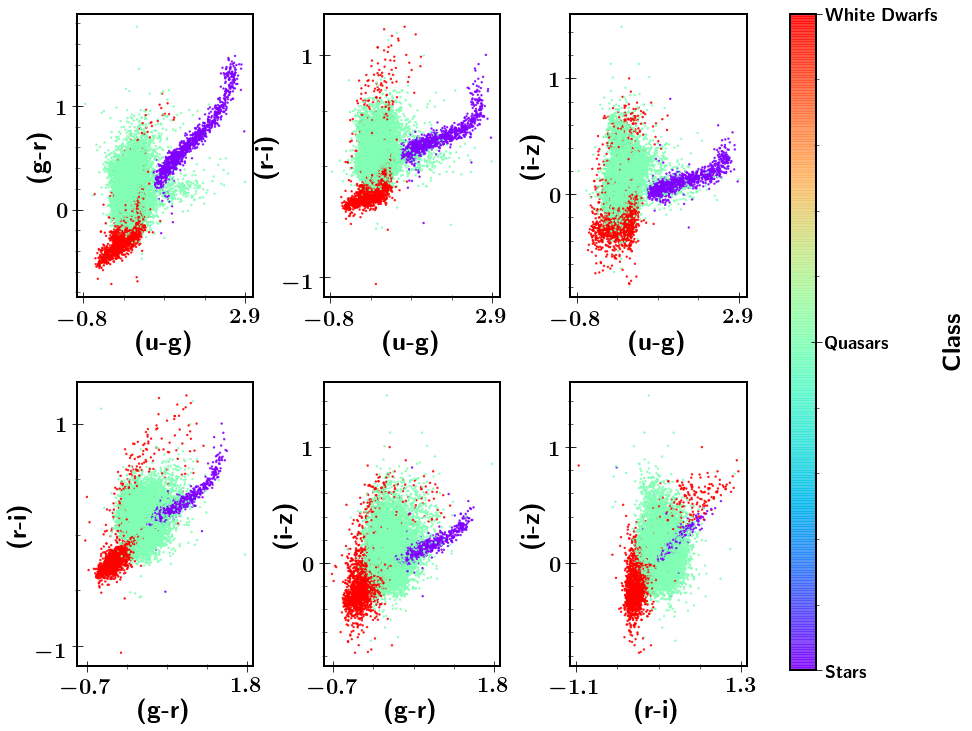

In [6]:
#Let's plot different colour-colour plots to see the data
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    c=target
    s=2
    if i<3:
        x_plot=colours[:,0]
        y_plot=colours[:,i+1]
        sc=ax.scatter(x_plot,y_plot,marker='o',alpha=0.8,c=c,s=s, cmap='rainbow')
        ax.set_yticks([int(min(y_plot)),int(max(y_plot))])
        ax.set_xticks([float("{:.1f}".format(min(x_plot))),float("{:.1f}".format(max(x_plot)))])
        ax.set_xlabel(r'\textbf{%s}'%names_colours[0])
        ax.set_ylabel(r'\textbf{%s}'%names_colours[i+1])

    elif (i==3) or (i==4):
        x_plot=colours[:,1]
        y_plot=colours[:,i-1]
        sc=ax.scatter(x_plot,y_plot,marker='o',alpha=0.8,c=c,s=s, cmap='rainbow')
        ax.set_yticks([int(min(y_plot)),int(max(y_plot))])
        ax.set_xticks([float("{:.1f}".format(min(x_plot))),float("{:.1f}".format(max(x_plot)))])
        ax.set_xlabel(r'\textbf{%s}'%names_colours[1])
        ax.set_ylabel(r'\textbf{%s}'%names_colours[i-1])

    else:
        x_plot=colours[:,2]
        y_plot=colours[:,3]
        sc=ax.scatter(x_plot,y_plot,marker='o',alpha=0.8,c=c,s=s, cmap='rainbow')
        ax.set_yticks([int(min(y_plot)),int(max(y_plot))])
        ax.set_xticks([float("{:.1f}".format(min(x_plot))),float("{:.1f}".format(max(x_plot)))])
        ax.set_xlabel(r'\textbf{%s}'%names_colours[2])
        ax.set_ylabel(r'\textbf{%s}'%names_colours[3])


#Color bar
cax = plt.axes([0.95, 0.120, 0.03, 0.76])
clb = plt.colorbar(sc,cax=cax,ticks=[1,2,3])
clb.ax.set_ylabel(r'\textbf{Class}')
clb.ax.set_yticklabels(name_target)
clb.ax.tick_params(labelsize=18)

fig.subplots_adjust(hspace=0.3)   
fig.subplots_adjust(wspace=0.4)  

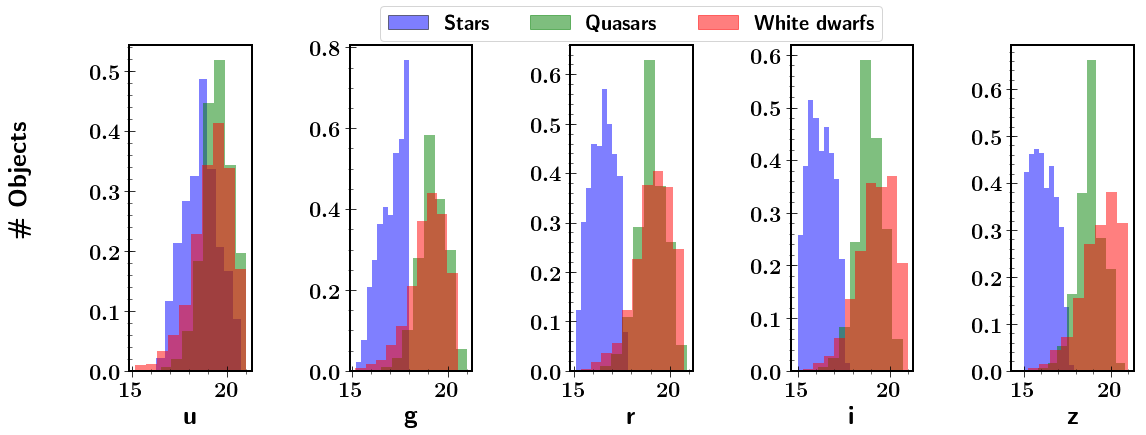

In [7]:
#Let's plot different the distribution of magnitudes
from matplotlib.patches import Rectangle
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 6))
mag_tot=m_u,m_g,m_r,m_i,m_z
filters=['u','g','r','i','z']
for i, ax in enumerate(axes.flatten()):
    ax.hist(mag_tot[i][target==1],alpha=0.5,color='blue',density=True)
    ax.hist(mag_tot[i][target==2],alpha=0.5,color='green',density=True)
    ax.hist(mag_tot[i][target==3],alpha=0.5,color='red',density=True)
    ax.set_xlabel(r'\textbf{%s}'%filters[i])
fig.subplots_adjust(wspace=0.8)
fig.add_subplot(111,frameon=False)
plt.tick_params(labelcolor='none',top=False,bottom=False,right=False,left=False)
plt.xticks([])
plt.yticks([])
fig.text(0.04, 0.57, r'\textbf{\# Objects}', va='center', ha='center', rotation='vertical',fontsize=25)

legend_elements = [Rectangle((0,0),1,1,color='b',alpha=0.5,ec='k', label=r'\textbf{Stars}'),Rectangle((0,0),1,1,color='g',alpha=0.5, label=r'\textbf{Quasars}'),Rectangle((0,0),1,1, color='r',alpha=0.5, label=r'\textbf{White dwarfs}')]
plt.legend(handles=legend_elements,loc=(0.25, 1.01), frameon=True,fancybox=True,markerscale=5,prop={'size':20},ncol=5)

## 2) Random Forest classifier

Random forest, as guessed by its name, consists of a large number of individual decision trees that operate as an ensemble.

Random forest classifier will fit a number of decision tree classifiers on various sub-samples of the training set.It then aggregates the votes from different decision trees to decide the final class of the test object. Note that each decision tree in the forest considers a random subset of features when forming questions and only has access to a random set of the training data points.

(image from https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d)
![title](Data/RF.png)


In [8]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(colours, target, test_size=0.2, random_state=1, stratify=None)
#‘random_state’ to 1 ensures that we get the same split each time so we can reproduce our results.
#Setting ‘stratify’ to None makes our training split represent the proportion of each value in the y variable.
print(np.size(X_train),np.size(X_test),np.size(X_train)+np.size(X_test))
#import the classifier
from sklearn.ensemble import RandomForestClassifier

63904 15980 79884


# 2.1) Find the best parameters

- <font color='red'>n_estimators: </font>Number of trees in forest. Default is 10.

- <font color='red'>criterion: </font>The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.

- <font color='red'>min_samples_split: </font>minimum number of working set size at node required to split.

- <font color='red'>max_depth: </font>The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- <font color='red'>min_samples_leaf: </font> The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches

In [9]:
# split data with Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit
ss = StratifiedShuffleSplit(n_splits=5,test_size=3000)
# Grid of params for RF
param_grid = {"max_depth": [10],
              "max_features": [None,'sqrt','log2'],
              "min_samples_split": [2,4,8],
              "min_samples_leaf": [1,3,5],
              "bootstrap": [True],
              "criterion": ["gini", "entropy"],
              "n_estimators": [15,20,25]}

# initialize RFC
rfc= RandomForestClassifier()
# initialize grid search
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=ss,n_jobs=4, verbose=1)
# fit data
grid_search.fit(X_test, y_test)

print("The best classifier is: ", grid_search.best_estimator_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  52 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 352 tasks      | elapsed:    8.0s


The best classifier is:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


[Parallel(n_jobs=4)]: Done 810 out of 810 | elapsed:   17.4s finished


# 2.2) Create and test model


In [10]:
#Use best parameters:
max_depth=grid_search.best_params_['max_depth']
print('Max depth: %s' % max_depth)
max_features=grid_search.best_params_['max_features']
print('Max features: %s' % max_features)
min_samples_split=grid_search.best_params_['min_samples_split']
print('min samples split: %s' % min_samples_split)
min_samples_leaf=grid_search.best_params_['min_samples_split']
print('min samples leaf: %s' % min_samples_leaf)
bootstrap=grid_search.best_params_['bootstrap']
print('bootstrap: %s' %bootstrap)
criterion=grid_search.best_params_['criterion']
print('criterion: %s' %criterion)
n_estimators=grid_search.best_params_['n_estimators']
print('n estimators: %s' %n_estimators)


# Create RF classifier with best parameters
rfc=RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, 
                           min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                           max_features=max_features,bootstrap=bootstrap,verbose=0)
# Fit the classifier to the data
rfc.fit(X_train,y_train)
#Predict the test sample
y_pred_rfc=rfc.predict(X_test)

Max depth: 10
Max features: log2
min samples split: 2
min samples leaf: 2
bootstrap: True
criterion: entropy
n estimators: 25


In [11]:
# Let's look the first 10 predictions and real label:
print('Real label: %s' % y_test[0:10])
print('prediction: %s' % y_pred_rfc[0:10])


Real label: [2 2 2 2 1 2 2 2 2 2]
prediction: [2 2 2 2 1 2 2 2 2 2]


# 2.3) Results


In [12]:
#Let's look at the accuracy, score
from sklearn import metrics
print(f'Accuracy RF SVM Classifier = {metrics.accuracy_score(y_test, y_pred_rfc):.4f}')
print(f'Precision for RF Classifier = %s'%np.around(metrics.precision_score(y_test, y_pred_rfc, average=None),3))
print(f'Recall for RF Classifier = %s'%np.around(metrics.recall_score(y_test, y_pred_rfc, average=None),3))
print(f'F1-score for RF Classifier = %s'%np.around(metrics.f1_score(y_test, y_pred_rfc, average=None),3))


Accuracy RF SVM Classifier = 0.9812
Precision for RF Classifier = [ 0.954  0.987  0.948]
Recall for RF Classifier = [ 0.967  0.991  0.911]
F1-score for RF Classifier = [ 0.96   0.989  0.929]


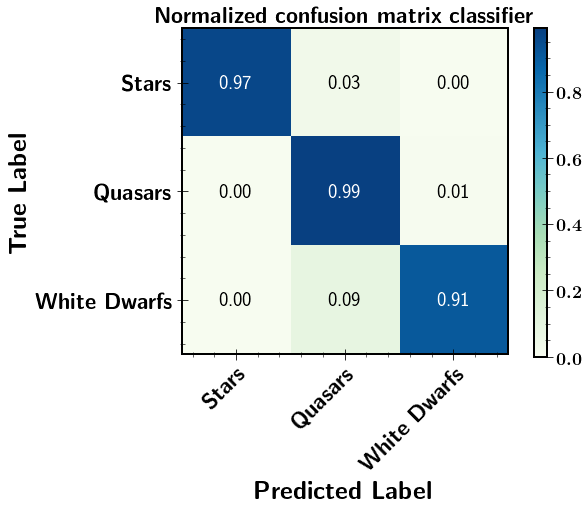

In [13]:
def conf_matrix(true, predict, classes, normalized=True, cl_names=None):
    '''
    function to plot confusion matrix
    '''
    cm = metrics.confusion_matrix(true, predict, labels=classes)
    if normalized:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title=r'\textbf{Normalized confusion matrix classifier}'
    else:
        title=r'\textbf{Confusion matrix classifier}'

    fig, ax = plt.subplots(figsize=(6,6), facecolor='w', edgecolor='k')
    im = ax.imshow(cm, interpolation='nearest', cmap="GnBu")
    
    #Color bar
    cax = plt.axes([0.95, 0.120, 0.03, 0.76])
    clb = fig.colorbar(im,cax=cax)
    clb.ax.tick_params(labelsize=18)
    
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),yticks=np.arange(cm.shape[0]),xticklabels=cl_names, 
           yticklabels=cl_names,xlabel=r'\textbf{Predicted Label}',ylabel=r'\textbf{True Label}',title=title)
        
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalized else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",size=20) 
    return ax

    
conf_matrix(y_test, y_pred_rfc, [1,2,3], cl_names=name_target)

In [14]:
#Classification Probability (10 first)
prediction_prob=rfc.predict_proba(X_test)
prob_df = pd.DataFrame(prediction_prob, columns=['Stars','Quasars','White dwarfs'])
prob_df.head(10)


,Stars,Quasars,White dwarfs
0,0.000000,0.999772,0.000228
1,0.001041,0.971754,0.027205
2,0.000256,0.972150,0.027593
3,0.000000,0.999716,0.000284
4,0.992871,0.007129,0.000000
5,0.000000,0.999213,0.000787
6,0.000000,0.960586,0.039414
7,0.000000,0.933223,0.066777
8,0.000000,0.940226,0.059774
9,0.000000,0.737391,0.262609


# 2.4) Feature importance

The importances returned in Skicit-learn represent how much including a particular variable improves the prediction. 

Text(0,0.5,'\\textbf{Importance}')

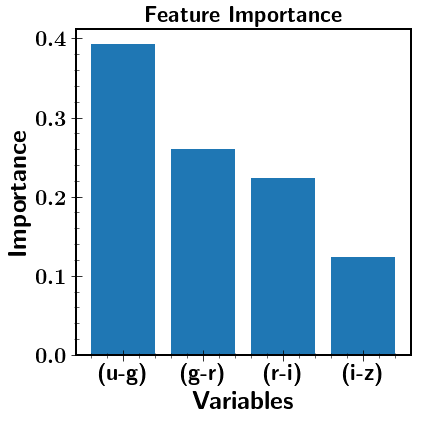

In [15]:
feat_impor=rfc.feature_importances_
fig,ax1 = plt.subplots(figsize=(6,6), facecolor='w', edgecolor='k')
x_values=np.array([0,1,2,3])
ax1.bar(x_values, feat_impor, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values,[r'\textbf{(u-g)}', r'\textbf{(g-r)}', r'\textbf{(r-i)}', r'\textbf{(i-z)}'])
# Axis labels and title
ax1.set_title(r'\textbf{Feature Importance}')
ax1.set_xlabel(r'\textbf{Variables}')
ax1.set_ylabel(r'\textbf{Importance}')



# 2.5) Visualising a Single Decision Tree

With the Random Forest implementation in Skicit-learn, we can visualise any of the trees in the forest


In [16]:
# Limit depth of tree to 3 levels
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz

rfc_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rfc_small.fit(X_test, y_test)
# Extract the small tree
tree_small = rfc_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = names_colours,
                rounded = True, precision = 1)
#Transform .dot to png
from subprocess import call
call(['dot', '-Tpng', 'small_tree.dot', '-o', 'small_tree.png', '-Gdpi=600'])

0

![title](Data/small_tree.png)

where:
mse= mean squared error of the node  

value: prediction (in degree) of all the points in the node

samples: number of data points in the node

Variable and value to split on node

In [22]:
# One random entire tree

# Extract the  tree
tree = rfc.estimators_[5]
# Save the tree as a png image
export_graphviz(tree, out_file = 'tree.dot', feature_names = names_colours,
                rounded = True, precision = 1)
#Transform .dot to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=100'])


![title](Data/tree.png)
